In [1]:
import pandas as pd
import numpy as np
from glob import glob
from pathlib import Path
import pynmea2
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from tqdm.notebook import tqdm
import copy


In [2]:
files_list = glob(r'../../Data/Caravela/CaravelaPCS/Datalog/Y20/*/*'+ '/recordDataPort_D*')  
files_list.sort()

In [3]:
files_list

['../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D15/recordDataPort_D_001_edited.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D15/recordDataPort_D_002.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D16/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D19/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D22/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D23/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D24/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D25/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D26/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D27/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D28/recordDataPort_D_001.txt',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D29/recordDataPort_D_001.txt',
 '../../Data/Caravela

In [4]:
li = []


for filename in tqdm(range(24,len(files_list))):
    with open(files_list[filename],'r') as myfile:
        content = myfile.readlines()[1:-1]
    frame = pd.DataFrame(data = np.array(content), columns= ['original'])
    li.append(frame)
df = pd.concat(li, axis=0,ignore_index=True)

In [5]:
del frame, content, li

In [6]:
myfile.close()

In [7]:
df['nmea_ident'] = copy.deepcopy(df.original.str[16:22])
df['desired'] = False
df.loc[df['nmea_ident'] == '$WIMWV', 'desired'] = True
#df.loc[df['nmea_ident'] == '$PCHPR', 'desired'] = True
des = df[df.desired]

In [8]:
des = des.reset_index()

In [9]:
des = des.drop(['index'], axis=1)

In [10]:
flump = []
des['NMEA'] = ''
des['NMEA_flag'] = 0
for i in tqdm(range(len(des['original']))):
    try: 
        nmea = pynmea2.parse(des['original'][i][16:], check=True)
    except ValueError:
        nmea = np.nan
        des.NMEA_flag[i] = 1
    flump.append(nmea)
des['NMEA'] = flump


<ipython-input-10-58aacda53822>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  des.NMEA_flag[i] = 1


In [11]:
des = des.dropna() #drop rows containing nan
des = des.reset_index()
des = des.drop(['index'], axis=1)

In [12]:
ext = pd.DataFrame()

In [13]:
foo = []
ext['datetime'] = ''
for i in tqdm(range(len(des['original']))):
    try: 
        time_in = ((datetime.strptime(des.original[i][:15], '%y%m%d,%H:%M:%S')))
    except ValueError:
        time_in = np.nan
    foo.append(time_in)
ext['datetime'] = foo

In [14]:
ext['wind_speed'] = ''
a=[]
for i in tqdm(range(len(des['NMEA']))):
    if des['nmea_ident'][i] == '$WIMWV':
        a.append(des['NMEA'][i].wind_speed)
    else:
        a.append(np.nan)
ext['wind_speed'] = a

In [15]:
ext['wind_speed_unit'] = ''
b=[]
for i in tqdm(range(len(des['NMEA']))):
    if des['nmea_ident'][i] == '$WIMWV':
        b.append(des['NMEA'][i].wind_speed_units)
    else:
        b.append(np.nan)
ext['wind_speed_unit'] = b

In [16]:
ext['wind_angle'] = ''
c=[]
for i in tqdm(range(len(des['NMEA']))):
    if des['nmea_ident'][i] == '$WIMWV':
        c.append(des['NMEA'][i].wind_angle)
    else:
        c.append(np.nan)
ext['wind_angle'] = c

In [17]:
ext['wind_angle_ref'] = ''
d=[]
for i in tqdm(range(len(des['NMEA']))):
    if des['nmea_ident'][i] == '$WIMWV':
        d.append(des['NMEA'][i].reference)
    else:
        d.append(np.nan)
ext['wind_angle_ref'] = d

In [26]:
ext.head(20)

,datetime,wind_speed,wind_speed_unit,wind_angle,wind_angle_ref
0,2020-02-10 23:59:59,10.2,N,102.6,R
1,2020-02-11 00:00:00,10.7,N,105.7,R
2,2020-02-11 00:00:00,10.9,N,102.3,R
3,2020-02-11 00:00:01,14.8,N,109.4,R
4,2020-02-11 00:00:01,18.9,N,112.5,R
5,2020-02-11 00:00:02,19.3,N,109.9,R
6,2020-02-11 00:00:02,18.6,N,111.6,R
7,2020-02-11 00:00:03,19.7,N,113.8,R
8,2020-02-11 00:00:03,19.3,N,115.3,R
9,2020-02-11 00:00:04,19.5,N,113.8,R


In [19]:
import matplotlib.pyplot as plt
font_size=22
plt.rcParams.update({'font.size': font_size})

Text(0.5, 0, 'Date')

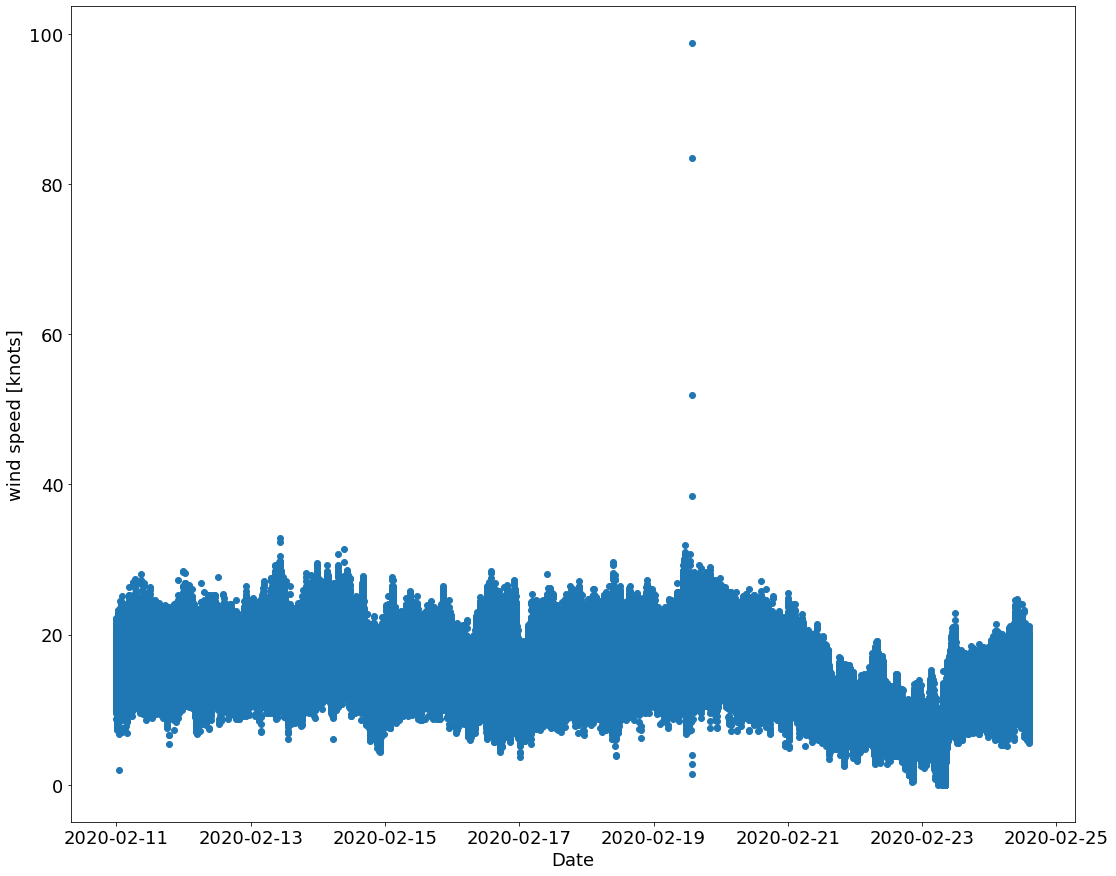

In [20]:
fig,ax = plt.subplots(1,1, figsize=(18, 15))
ax.scatter(ext['datetime'], ext['wind_speed'])
ax.set_ylabel('wind speed [knots]')
ax.set_xlabel('Date')

In [21]:
# to check  all units are knots(N)
ext.wind_speed_unit.unique()

array(['N', 'W'], dtype=object)

In [22]:
# to check all wind speeds are relative to heading(R)
ext.wind_angle_ref.unique()

array(['R'], dtype=object)

In [27]:
ext[ext['wind_speed_unit'].str.contains('W')]

,datetime,wind_speed,wind_speed_unit,wind_angle,wind_angle_ref


In [24]:
ext=ext.drop(ext.index[1813326], axis=0)

In [25]:
ext.to_csv('../../Interim_products/relativewind_pt3.csv',index = None)